## Correlação e Regressão

### Importações

In [1]:
# Bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import math

### Base de Dados

In [2]:
# Dados
tamanho = np.array([30, 39, 49, 60])
preco = np.array([57000, 69000, 77000, 90000])

In [3]:
# Transformando os dados em Dataframes
ds = pd.DataFrame({'tamanho': tamanho, 'preco': preco})
ds

,tamanho,preco
0,30,57000
1,39,69000
2,49,77000
3,60,90000


In [4]:
# Média da coluna tamanho e preço
media_tamanho = ds['tamanho'].mean()
media_preco = ds['preco'].mean()
media_tamanho, media_preco

(44.5, 73250.0)

In [5]:
# Desvio padrão da coluna tamanho e preço
dp_tamanho = ds['tamanho'].std()
dp_preco = ds['preco'].std()
dp_tamanho, dp_preco

(12.922847983320086, 13865.424623862047)

### Correlação - Cálculo Manual

In [6]:
# Criando a coluna de diferencia entre os valores
ds['dif'] = (ds['tamanho'] - media_tamanho) * (ds['preco'] - media_preco)
ds

,tamanho,preco,dif
0,30,57000,235625.0
1,39,69000,23375.0
2,49,77000,16875.0
3,60,90000,259625.0


In [7]:
# Somando todos os valores da coluna dif
soma_dif = ds['dif'].sum()
soma_dif

535500.0

In [8]:
# Calculando a Covariância
covariancia = soma_dif / (len(ds) - 1)
covariancia

178500.0

In [9]:
# Coeficiente de Correlação
coeficiente_correlacao = covariancia / (dp_tamanho * dp_preco)
coeficiente_correlacao

0.9962006267707775

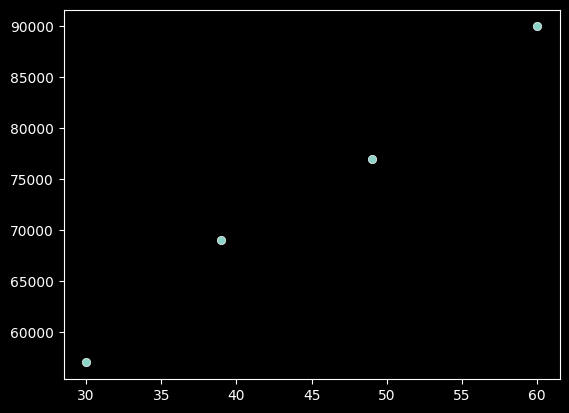

In [10]:
# Gráfico
sns.scatterplot(x=tamanho, y=preco);

In [11]:
# Coeficiente de Determinação
coeficiente_determinacao = math.pow(coeficiente_correlacao, 2)
coeficiente_determinacao

0.9924156887784898

### Correlação - Cálculo com Numpy e Pandas

In [12]:
# Calculando a Covariância com Numpy
np.cov(tamanho, preco)

array([[1.6700e+02, 1.7850e+05],
       [1.7850e+05, 1.9225e+08]])

In [13]:
# Calculando a Covariância com Pandas
ds.cov()

,tamanho,preco,dif
tamanho,167.0,178500.0,1.850000e+05
preco,178500.0,192250000.0,1.612500e+08
dif,185000.0,161250000.0,1.735512e+10


In [14]:
# Coeficiente de Correlação com Numpy
np.corrcoef(tamanho, preco)

array([[1.        , 0.99620063],
       [0.99620063, 1.        ]])

In [15]:
# Coeficiente de Correlação com Pandas
ds.corr()

,tamanho,preco,dif
tamanho,1.000000,0.996201,0.108667
preco,0.996201,1.000000,0.088278
dif,0.108667,0.088278,1.000000


## Correlação com a biblioteca Yellowbrick
- https://www.scikit-yb.org/en/latest/

### Importação

In [16]:
# Lib
from yellowbrick.target import FeatureCorrelation

### Base de Dados

In [17]:
# dados
df = pd.read_csv('../Distribuições_Estatisticas/house_prices.csv')
# Eliminando os dados
df = df.drop(['id', 'date'], axis = 1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [18]:
# Nomes das colunas
df.columns[1:]

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

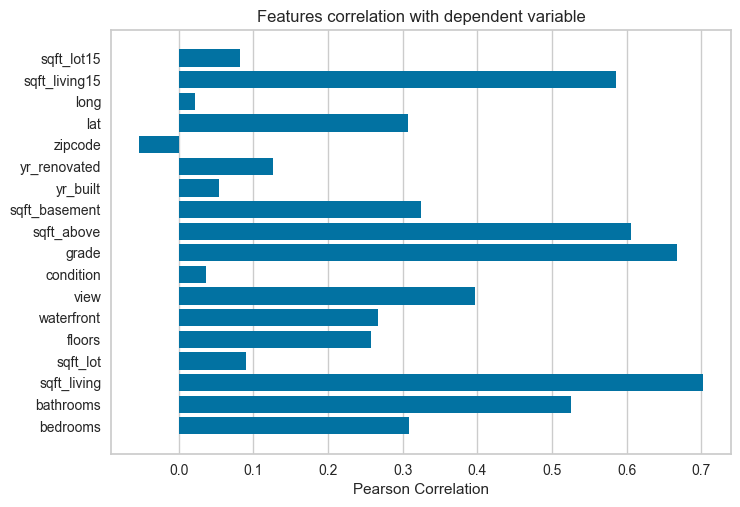

In [19]:
# Gráfico de correlação
grafico = FeatureCorrelation(labels=df.columns[1:])
grafico.fit(df.iloc[:, 1:19].values, df.iloc[:, 0].values)
grafico.show();

### Regressão
- Correlação: relacionamento entre variáveis, uma variável afeta a outra. Duas vias: correlação de price x sqft_living = correlação sqft_living x price
- Regressão é uma via: sqft_living para prever o preço é diferente de utilizar o preço para prever sqft_living
- Espera-se que a correlação seja de moderada a forte para obter um bom modelo (positiva ou negativa)
- Coeficiente de determinação (R2): > 0.7 é um bom valor. Entre 0 e 0.3 é ruim. Entre esses valores é interessante fazer testes
- Regressão linear: existir lineariedade

### Regressão linear simples

- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [20]:
# Variável independente 
X = df['sqft_living'].values
X.shape

(21613,)

In [21]:
# Transformando em matriz
X = X.reshape(-1, 1)
X.shape

(21613, 1)

In [22]:
# Variável de previsão
y = df['price'].values
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [23]:
# Separando em treino e teste
from sklearn.model_selection import train_test_split
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(
    X, y, test_size = 0.2, random_state = 1
)
X_treinamento.shape, X_teste.shape

((17290, 1), (4323, 1))

In [24]:
# Treinado o modelo
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_treinamento, y_treinamento)

LinearRegression()

In [25]:
# b0
regressor.intercept_

-30186.361061054515

In [26]:
# b1
regressor.coef_

array([273.82181112])

In [27]:
# Calculo de predição manual
regressor.intercept_ + regressor.coef_ * 900

array([216253.26894848])

In [28]:
# Calculo de predição manual
regressor.predict(np.array([[900]]))

array([216253.26894848])

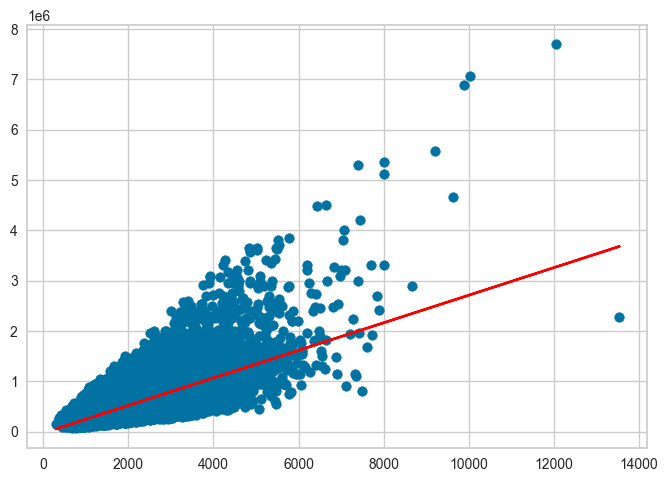

In [29]:
# Gráfico de Regressão
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, regressor.predict(X), color = 'red')

In [30]:
# Coeficiente R2 na base de treinamento
regressor.score(X_treinamento, y_treinamento)

0.48876078213887486

In [31]:
# Coeficiente R2 na base de teste
regressor.score(X_teste, y_teste)

0.5033019006466926

### Métricas de erros

In [32]:
# Criando a classe de previsão
previsoes = regressor.predict(X_teste)

In [33]:
# Visualizando a previsão e y_teste
previsoes, y_teste

(array([ 733776.4919685 ,  416143.19106732,  618771.33129738, ...,
         449001.80840193, 1412854.58355032,  380546.3556215 ]),
 array([ 459000.,  445000., 1057000., ...,  260000., 1795000.,  418000.]))

In [34]:
# Libs
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [35]:
# A Diferenças absolutas entre as previsões e os valores reais
mean_absolute_error(y_teste, previsoes)

178578.01159005202

In [36]:
# Diferenças elevadas ao quadrado
mean_squared_error(y_teste, previsoes)

85730574276.16483

In [37]:
# Raiz da Diferenças elevadas ao quadrado
math.sqrt(mean_squared_error(y_teste, previsoes))

292797.83857836935

### Regressão linear múltipla

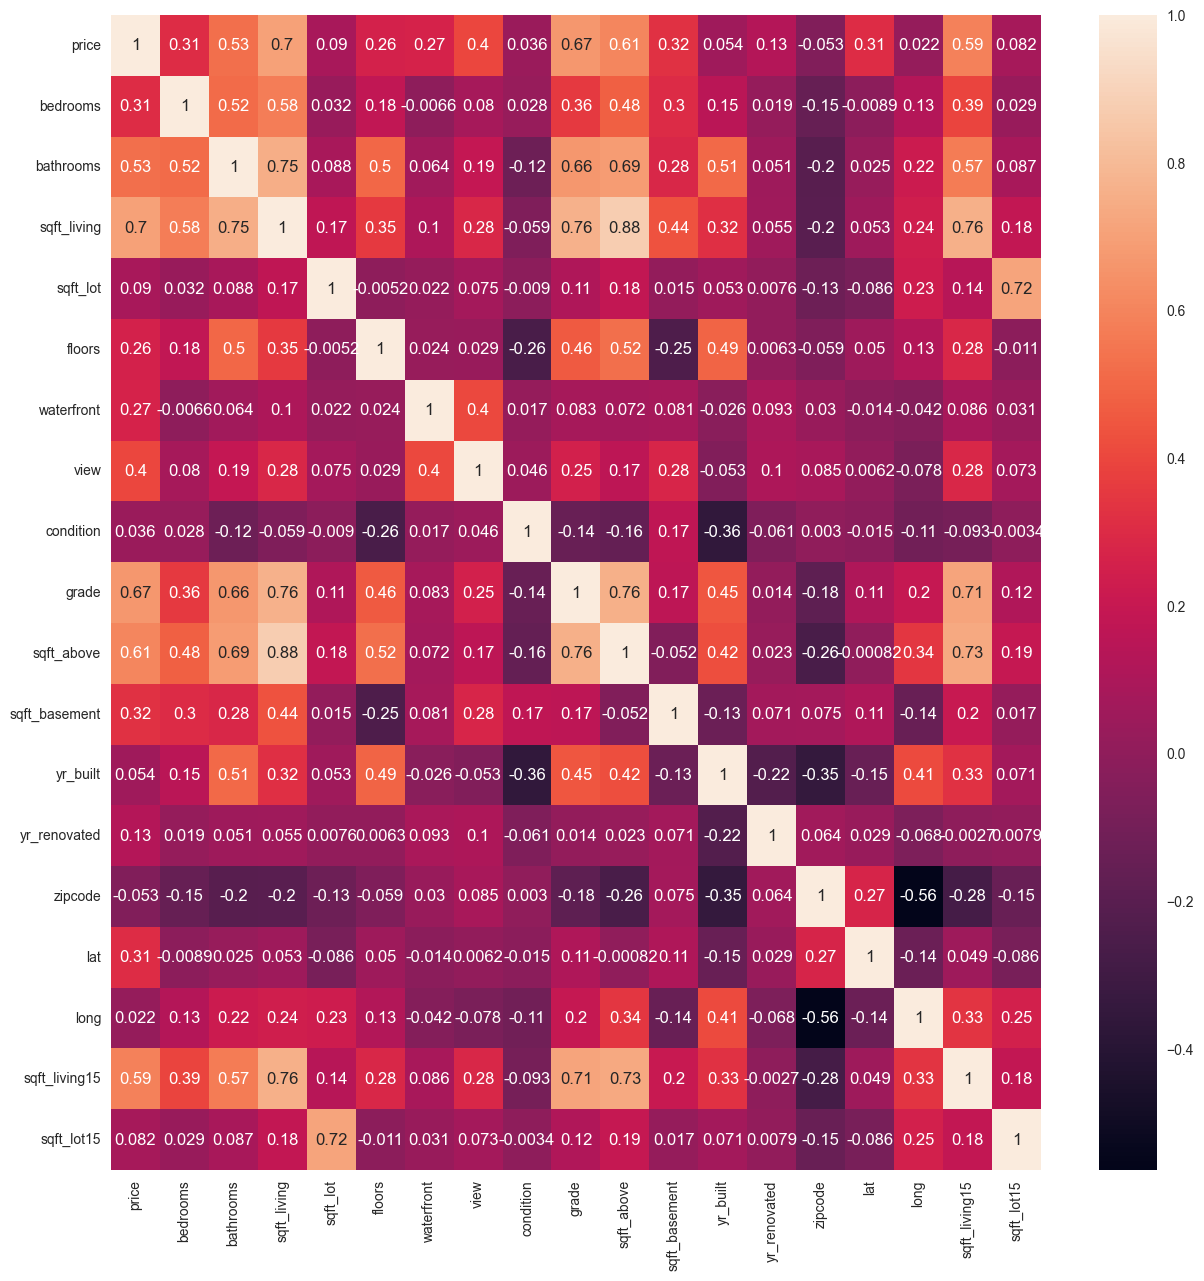

In [38]:
# Gráfico de correlação
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(df.corr(), annot=True)

In [39]:
# Separando as variáveis 
X = df.iloc[:, [2, 3, 9, 10]].values
X

array([[1.00e+00, 1.18e+03, 7.00e+00, 1.18e+03],
       [2.25e+00, 2.57e+03, 7.00e+00, 2.17e+03],
       [1.00e+00, 7.70e+02, 6.00e+00, 7.70e+02],
       ...,
       [7.50e-01, 1.02e+03, 7.00e+00, 1.02e+03],
       [2.50e+00, 1.60e+03, 8.00e+00, 1.60e+03],
       [7.50e-01, 1.02e+03, 7.00e+00, 1.02e+03]])

In [40]:
# Separando a classe
y = df.iloc[:, 0].values
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

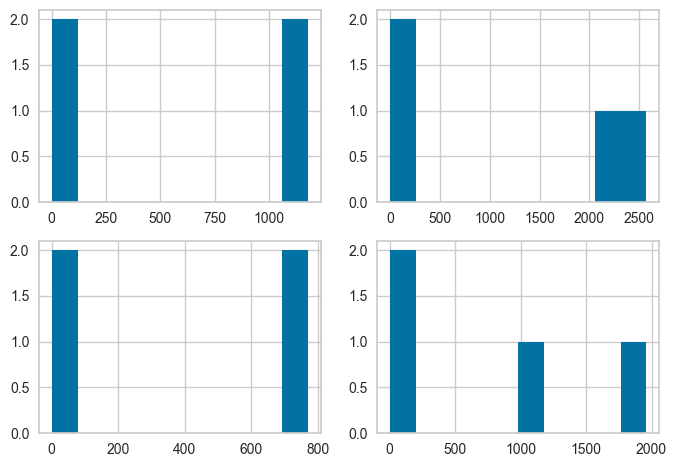

In [41]:
# Gráficos das variáveis
import matplotlib.pyplot as plt
f, ax = plt.subplots(2, 2)
ax[0, 0].hist(X[0])
ax[0, 1].hist(X[1])
ax[1, 0].hist(X[2])
ax[1, 1].hist(X[3]);

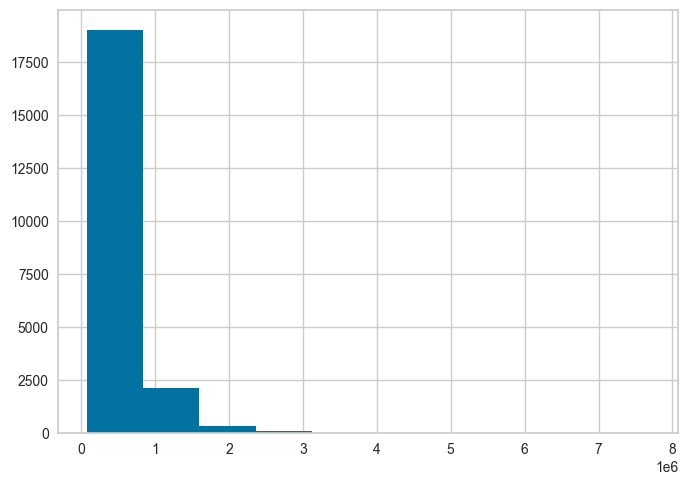

In [42]:
# Gráfico da classe
plt.hist(y);

In [43]:
# logarítmico de y para transformar em uma distribuição normal
y = np.log(y)

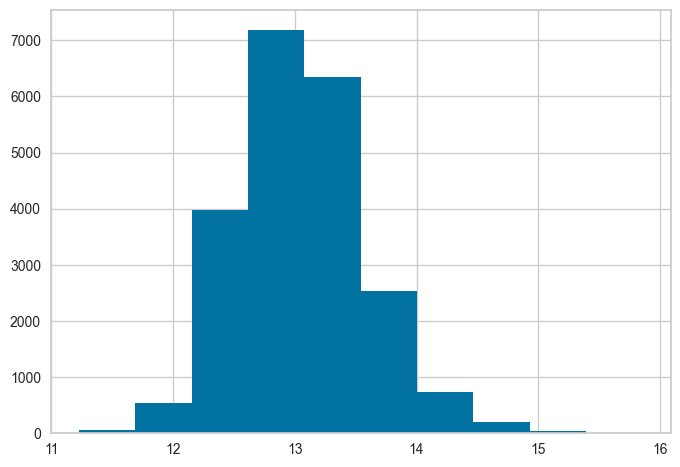

In [44]:
# Novo gráfico da classe
plt.hist(y);

In [45]:
# Dividindo entre treino e teste
from sklearn.model_selection import train_test_split
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)
X_treinamento.shape, X_teste.shape

((17290, 4), (4323, 4))

In [46]:
# Treinado o modelo
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_treinamento, y_treinamento)

LinearRegression()

In [47]:
# Score do treinamento
regressor.score(X_treinamento, y_treinamento)

0.5621078983042501

In [48]:
# Score do teste
regressor.score(X_teste, y_teste)

0.5736441443868048

In [49]:
# A variável de previsões e diferença de erro
previsoes = regressor.predict(X_teste)
mean_absolute_error(y_teste, previsoes)

0.27780438890683556